<a href="https://colab.research.google.com/github/AmrMKayid/KayMo/blob/master/KayMo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

# Download Raw datasets

In [2]:
!wget http://www.emodb.bilderbar.info/download/download.zip -O emodb.zip

--2019-09-10 18:05:30--  http://www.emodb.bilderbar.info/download/download.zip
Resolving www.emodb.bilderbar.info (www.emodb.bilderbar.info)... 85.13.147.80
Connecting to www.emodb.bilderbar.info (www.emodb.bilderbar.info)|85.13.147.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40567066 (39M) [application/zip]
Saving to: ‘emodb.zip’

emodb.zip           100%[===================>]  38.69M  7.68MB/s    in 5.6s    

2019-09-10 18:05:36 (6.90 MB/s) - ‘emodb.zip’ saved [40567066/40567066]



In [3]:
!wget https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1 -O ravdess_songs.zip

--2019-09-10 18:05:38--  https://zenodo.org/record/1188976/files/Audio_Song_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225505317 (215M) [application/octet-stream]
Saving to: ‘ravdess_songs.zip’

ravdess_songs.zip   100%[===================>] 215.06M  23.6MB/s    in 10s     

2019-09-10 18:05:49 (21.4 MB/s) - ‘ravdess_songs.zip’ saved [225505317/225505317]



In [4]:
!wget https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1 -O ravdess_speech.zip

--2019-09-10 18:05:50--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.184.65.20
Connecting to zenodo.org (zenodo.org)|188.184.65.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208468073 (199M) [application/octet-stream]
Saving to: ‘ravdess_speech.zip’

ravdess_speech.zip  100%[===================>] 198.81M  23.0MB/s    in 9.4s    

2019-09-10 18:06:00 (21.1 MB/s) - ‘ravdess_speech.zip’ saved [208468073/208468073]



In [5]:
!wget --user guest2savee --password welcome! http://kahlan.eps.surrey.ac.uk/savee/Data/Zip/AudioData.zip -O savee.zip

--2019-09-10 18:06:02--  http://kahlan.eps.surrey.ac.uk/savee/Data/Zip/AudioData.zip
Resolving kahlan.eps.surrey.ac.uk (kahlan.eps.surrey.ac.uk)... 131.227.95.16
Connecting to kahlan.eps.surrey.ac.uk (kahlan.eps.surrey.ac.uk)|131.227.95.16|:80... connected.
HTTP request sent, awaiting response... 401 Unauthorized
Authentication selected: Basic realm="Secure SAVEE Database"
Reusing existing connection to kahlan.eps.surrey.ac.uk:80.
HTTP request sent, awaiting response... 200 OK
Length: 113281384 (108M) [application/zip]
Saving to: ‘savee.zip’

savee.zip           100%[===================>] 108.03M  29.5MB/s    in 4.0s    

2019-09-10 18:06:07 (26.8 MB/s) - ‘savee.zip’ saved [113281384/113281384]



In [0]:
!mkdir datasets datasets/emodb datasets/ravdess datasets/savee models

In [7]:
!unzip emodb.zip -d datasets/emodb

Archive:  emodb.zip
   creating: datasets/emodb/lablaut/
  inflating: datasets/emodb/lablaut/14a04Lbxx.lablaut  
  inflating: datasets/emodb/lablaut/03a07Fbxx.lablaut  
  inflating: datasets/emodb/lablaut/16b03Faxx.lablaut  
  inflating: datasets/emodb/lablaut/15a05Lbxx.lablaut  
  inflating: datasets/emodb/lablaut/16a02Lbxx.lablaut  
  inflating: datasets/emodb/lablaut/14a04Aaxx.lablaut  
  inflating: datasets/emodb/lablaut/12b03Taxx.lablaut  
  inflating: datasets/emodb/lablaut/16a05Laxx.lablaut  
  inflating: datasets/emodb/lablaut/16b03Taxx.lablaut  
  inflating: datasets/emodb/lablaut/11a05Fcxx.lablaut  
  inflating: datasets/emodb/lablaut/03a02Taxx.lablaut  
  inflating: datasets/emodb/lablaut/09b03Edxx.lablaut  
  inflating: datasets/emodb/lablaut/12a01Fbxx.lablaut  
  inflating: datasets/emodb/lablaut/10a02Faxx.lablaut  
  inflating: datasets/emodb/lablaut/08a04Tbxx.lablaut  
  inflating: datasets/emodb/lablaut/09a05Tbxx.lablaut  
  inflating: datasets/emodb/lablaut/09b03Wbxx.l

In [8]:
!unzip savee.zip -d datasets/savee
!mv datasets/savee/AudioData/* datasets/savee/ 
! rm -rf datasets/savee/AudioData/

Archive:  savee.zip
   creating: datasets/savee/AudioData/
   creating: datasets/savee/AudioData/DC/
  inflating: datasets/savee/AudioData/DC/a01.wav  
  inflating: datasets/savee/AudioData/DC/a02.wav  
  inflating: datasets/savee/AudioData/DC/a03.wav  
  inflating: datasets/savee/AudioData/DC/a04.wav  
  inflating: datasets/savee/AudioData/DC/a05.wav  
  inflating: datasets/savee/AudioData/DC/a06.wav  
  inflating: datasets/savee/AudioData/DC/a07.wav  
  inflating: datasets/savee/AudioData/DC/a08.wav  
  inflating: datasets/savee/AudioData/DC/a09.wav  
  inflating: datasets/savee/AudioData/DC/a10.wav  
  inflating: datasets/savee/AudioData/DC/a11.wav  
  inflating: datasets/savee/AudioData/DC/a12.wav  
  inflating: datasets/savee/AudioData/DC/a13.wav  
  inflating: datasets/savee/AudioData/DC/a14.wav  
  inflating: datasets/savee/AudioData/DC/a15.wav  
  inflating: datasets/savee/AudioData/DC/d01.wav  
  inflating: datasets/savee/AudioData/DC/d02.wav  
  inflating: datasets/savee/Audi

In [9]:
!mkdir datasets/ravdess/songs datasets/ravdess/speech
!unzip ravdess_songs.zip -d datasets/ravdess/songs
!unzip ravdess_speech.zip -d datasets/ravdess/speech/

Archive:  ravdess_songs.zip
   creating: datasets/ravdess/songs/Actor_01/
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-01-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-01-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-02-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-01-01-02-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-01-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-01-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-02-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-01-02-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-01-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-01-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-02-01-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-02-02-02-02-01.wav  
  inflating: datasets/ravdess/songs/Actor_01/03-02-03-01-01-01

In [0]:
!mkdir datasets/kaymodb datasets/kaymodb_images

# Prepare the datasets

In [11]:
import os
import shutil
from collections import defaultdict, Counter

KAYMODB_PATH = f'datasets/kaymodb/'
KAYMODB_PATH

'datasets/kaymodb/'

## EmoDB

In [12]:
def prepare_emodb():
    emodb_path = f'datasets/emodb/wav/'
    wav_data = os.listdir(emodb_path)

    EMOTIONS = {
        'W': 'angry',
        'L': 'bored',
        'E': 'disgust',
        'A': 'fearful',
        'F': 'happy',
        'T': 'sad',
        'N': 'neutral',
    }
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    wav_file_path = []

    for wav_file in wav_data:
        if not wav_file.endswith('wav'):
            continue
        wav_info, ext = wav_file.split('.')
        # print(wav_info)
        speaker_num, text, emotion, extra = wav_info[:2], wav_info[2:5], wav_info[5], wav_info[6]
        # print(speaker_num, text, emotion, extra)
        emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
        # print(emotion_path)
        os.makedirs(emotion_path, exist_ok=True)

        # print(emodb_path + wav_file, emotion_path + f'/0_emodb_{EMOTIONS[emotion]}
        # _{emotion_count[EMOTIONS[emotion]]}.wav')
        shutil.copy(emodb_path + wav_file,
                    emotion_path + f'/0_emodb_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
        emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)
 

prepare_emodb()

Counter({'angry': 1, 'bored': 1, 'disgust': 1, 'fearful': 1, 'happy': 1, 'sad': 1, 'neutral': 1})
Counter({'angry': 128, 'bored': 82, 'neutral': 80, 'happy': 72, 'fearful': 70, 'sad': 63, 'disgust': 47})


## Ravdess

In [13]:
def prepare_ravdess():
    ravdess_path = f'datasets/ravdess'
    wav_songs_data_path = f'{ravdess_path}/songs'
    wav_speech_data_path = f'{ravdess_path}/speech'

    EMOTIONS = {
        '01': 'neutral',
        '02': 'calm',  # New
        '03': 'happy',
        '04': 'sad',
        '05': 'angry',
        '06': 'fearful',
        '07': 'disgust',
        '08': 'surprised'  # New
    }
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    # ravdees(wav_songs_data_path, EMOTIONS)
    wav_data = os.listdir(wav_songs_data_path)

    wav_file_path = []

    for folder in wav_data:
        if not folder.startswith('Actor'):
            continue

        actor_path = f'{wav_songs_data_path}/{folder}/'
        # print(actor_path)
        actor = os.listdir(actor_path)
        # print('###########################################', actor, len(actor))
        for wav_file in actor:
            if not wav_file.endswith('wav'):
                continue
            wav_info, ext = wav_file.split('.')
            emotion = wav_info.split('-')[2]
            # print(EMOTIONS[emotion])

            emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
            # print(emotion_path)
            os.makedirs(emotion_path, exist_ok=True)

            # print(actor_path + wav_file,
            #       emotion_path + f'/01_1_ravdees_songs__{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            shutil.copy(actor_path + wav_file,
                        emotion_path + f'/01-1-songs_ravdees_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)

    # ravdees(wav_speech_data_path, EMOTIONS)
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    wav_data = os.listdir(wav_speech_data_path)

    wav_file_path = []

    for folder in wav_data:
        if not folder.startswith('Actor'):
            continue

        actor_path = f'{wav_speech_data_path}/{folder}/'
        # print(actor_path)
        actor = os.listdir(actor_path)
        # print('###########################################', actor, len(actor))
        for wav_file in actor:
            if not wav_file.endswith('wav'):
                continue
            wav_info, ext = wav_file.split('.')
            emotion = wav_info.split('-')[2]
            # print(EMOTIONS[emotion])

            emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
            # print(emotion_path)
            os.makedirs(emotion_path, exist_ok=True)

            # print(actor_path + wav_file,
            #       emotion_path + f'/01_2_ravdees_speech__{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            shutil.copy(actor_path + wav_file,
                        emotion_path + f'/01-2-speech_ravdees_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)

    
prepare_ravdess()

Counter({'neutral': 1, 'calm': 1, 'happy': 1, 'sad': 1, 'angry': 1, 'fearful': 1, 'disgust': 1, 'surprised': 1})
Counter({'calm': 185, 'happy': 185, 'sad': 185, 'angry': 185, 'fearful': 185, 'neutral': 93, 'disgust': 1, 'surprised': 1})
Counter({'neutral': 1, 'calm': 1, 'happy': 1, 'sad': 1, 'angry': 1, 'fearful': 1, 'disgust': 1, 'surprised': 1})
Counter({'calm': 193, 'happy': 193, 'sad': 193, 'angry': 193, 'fearful': 193, 'disgust': 193, 'surprised': 193, 'neutral': 97})


## Savee

In [0]:
!rm -rf datasets/savee/Info.txt

In [15]:
def prepare_savee():
    savee_path = f'datasets/savee/'
    wav_data = os.listdir(savee_path)

    EMOTIONS = {
        'a': 'angry',
        'd': 'disgust',
        'f': 'fearful',
        'h': 'happy',
        'n': 'neutral',
        'sa': 'sad',
        'su': 'surprised'
    }
    emotion_count = Counter(EMOTIONS.values())
    print(emotion_count)

    for folder in wav_data:
#         if not os.path.isDir(folder):
#             continue

        actor_path = f'{savee_path}{folder}'
        actor = os.listdir(actor_path)
        # print('###########################################', len(actor))
        for wav_file in actor:
            if not wav_file.endswith('wav'):
                continue
            wav_info, ext = wav_file.split('.')
            emotion = wav_info[:2]
            if not emotion.startswith('s'):
                emotion = emotion[0]

            emotion_path = KAYMODB_PATH + EMOTIONS[emotion]
            # print(emotion_path)
            os.makedirs(emotion_path, exist_ok=True)

            # print(actor_path + '/' + wav_file,
            #       emotion_path + f'/02_savee_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            shutil.copy(actor_path + '/' + wav_file,
                        emotion_path + f'/02_savee_{EMOTIONS[emotion]}_{emotion_count[EMOTIONS[emotion]]}.wav')
            emotion_count[EMOTIONS[emotion]] += 1

    print(emotion_count)
    
    
prepare_savee()

Counter({'angry': 1, 'disgust': 1, 'fearful': 1, 'happy': 1, 'neutral': 1, 'sad': 1, 'surprised': 1})
Counter({'neutral': 121, 'angry': 61, 'disgust': 61, 'fearful': 61, 'happy': 61, 'sad': 61, 'surprised': 61})


### emotion count

In [16]:
! find datasets/kaymodb/ -type f | wc -l

3467


# Features Extraction

In [0]:
import os

import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm

In [0]:
def extract_audio_feature(path, mono=True, sr=16000):
    y, sr = librosa.load(path, mono=mono, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = librosa.feature.rms(y=y)
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zcr = librosa.feature.zero_crossing_rate(y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    features = f'{np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} ' \
        f'{np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
    for e in mfcc:
        features += f' {np.mean(e)}'
    return features

In [0]:
def create_kaymodb_csv(mono=True, sr=16000):
    df = {'dataset': [], 'filename': [], 'emotion': [], 'length': [], 'path': [], 'features': []}
    emotions = os.listdir(KAYMODB_PATH)
#     emotions.remove('.DS_Store')
    print(emotions)
    for emotion in emotions:
        wav_files = os.listdir(f'{KAYMODB_PATH}{emotion}')
        print(f'\nEmotion: {emotion}\n')
        for wav in tqdm(wav_files):
            wav_info = wav.split('_')
            dataset, emotion, path = wav_info[1], wav_info[2], f'{KAYMODB_PATH}{emotion}/{wav}'
            # print(dataset, emotion, path)
            df['dataset'].append(dataset)
            df['filename'].append(wav)
            df['emotion'].append(emotion)
            y, sr = librosa.load(f'{KAYMODB_PATH}{emotion}/{wav}', mono=mono, sr=sr)
            df['length'].append(y.shape[0] / sr)
            df['path'].append(path)
            features = extract_audio_feature(path).split()
            df['features'].append(features)

    df = pd.DataFrame(df)
    df = df.sample(frac=1).reset_index(drop=True)
    features = df['features'].apply(pd.Series)  # expand df.features into its own dataframe
    features = features.rename(columns=lambda x: 'features_' + str(x))  # rename each variable is tags
    # print(features)
    df = pd.concat([df[:], features[:]], axis=1)  # join the features dataframe back to the original dataframe
    df.drop(columns=['features'], axis=1, inplace=True)
    print(df.head())
    df.to_csv(f'kaymodb.csv', index=None, header=True)

In [20]:
create_kaymodb_csv()

  0%|          | 0/387 [00:00<?, ?it/s]

['neutral', 'happy', 'fearful', 'calm', 'disgust', 'surprised', 'angry', 'bored', 'sad']

Emotion: neutral



  0%|          | 0/507 [00:00<?, ?it/s]


Emotion: happy



  0%|          | 0/505 [00:00<?, ?it/s]


Emotion: fearful



  0%|          | 0/376 [00:00<?, ?it/s]


Emotion: calm



  0%|          | 0/298 [00:00<?, ?it/s]


Emotion: disgust



  0%|          | 0/252 [00:00<?, ?it/s]


Emotion: surprised



  0%|          | 0/563 [00:00<?, ?it/s]


Emotion: angry



  0%|          | 0/81 [00:00<?, ?it/s]


Emotion: bored



  0%|          | 0/498 [00:00<?, ?it/s]


Emotion: sad



100%|██████████| 498/498 [04:57<00:00,  1.47it/s]


   dataset  ...          features_25
0  ravdees  ...  -2.7744954929295664
1    savee  ...    3.696196873296341
2  ravdees  ...  -1.6300084713675371
3    savee  ...   1.5488265988761456
4    emodb  ...    12.58821383849566

[5 rows x 31 columns]


# Basic Approach: Using Audio features

In [21]:
kaymodb = pd.read_csv('kaymodb.csv')
kaymodb.head()

,dataset,filename,emotion,length,path,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25
0,ravdees,01-2-speech_ravdees_fearful_109.wav,fearful,3.436812,datasets/kaymodb/fearful/01-2-speech_ravdees_f...,0.482503,0.005623,2376.413406,1738.069201,4302.734375,0.297445,-588.313562,45.732852,-7.696387,12.649853,-0.464303,-1.987376,-8.469745,-10.022252,-7.188105,0.385649,-5.768017,-0.338393,-4.379641,-0.548062,-3.225712,-2.744175,-1.987886,-2.267652,-5.024352,-2.774495
1,savee,02_savee_surprised_36.wav,surprised,3.851187,datasets/kaymodb/surprised/02_savee_surprised_...,0.410226,0.213222,1092.474232,1154.432459,1766.787190,0.061939,-235.710922,88.164723,1.411606,11.228053,-21.182836,-9.791741,-10.127265,-12.578283,-13.606875,-4.259209,-2.919416,-2.908160,-7.292126,2.765183,-7.404420,-1.710647,-5.832857,-4.773514,-2.075035,3.696197
2,ravdees,01-1-songs_ravdees_fearful_112.wav,fearful,4.137500,datasets/kaymodb/fearful/01-1-songs_ravdees_fe...,0.433510,0.018268,2306.330875,1769.152176,4332.992788,0.268923,-457.048466,42.376518,-27.775789,17.070818,-13.890469,-20.376678,-10.658933,-10.979600,-9.923360,-4.140299,-8.366181,-0.610293,-9.203087,-0.925128,-7.034798,-3.425711,-4.512589,-2.825122,-9.212588,-1.630008
3,savee,02_savee_neutral_84.wav,neutral,2.830188,datasets/kaymodb/neutral/02_savee_neutral_84.wav,0.522955,0.088981,782.853458,1043.838650,1435.393258,0.018549,-335.425117,100.146608,22.926006,21.908122,-16.485606,-4.303127,1.163540,-12.921136,-2.599127,6.522033,-0.347991,-0.105061,0.461584,5.128041,-1.342043,-0.901857,-1.961971,-2.397461,-2.054443,1.548827
4,emodb,0_emodb_angry_72.wav,angry,2.012750,datasets/kaymodb/angry/0_emodb_angry_72.wav,0.343486,0.081064,2204.015234,1744.778095,4265.252976,0.156847,-234.588308,41.229844,-23.884778,18.673023,-24.108393,4.034844,-18.591436,-9.365092,-22.959283,-11.461103,-4.136011,-16.336390,4.049004,-3.718759,-9.450498,-1.439416,-9.402782,-0.439166,7.504218,12.588214


In [22]:
kaymodb.emotion.value_counts() #(normalize=True)

angry        563
happy        507
fearful      505
sad          498
neutral      387
calm         376
disgust      298
surprised    252
bored         81
Name: emotion, dtype: int64

In [23]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from keras import models, layers, losses, callbacks

Using TensorFlow backend.


In [0]:
def load_audio_data():
    features = kaymodb.iloc[:, 5:]
    x = np.array(features, dtype=float)
    
    emotions = kaymodb.emotion
    encoder = LabelEncoder()
    y = encoder.fit_transform(emotions)
    
    return train_test_split(x, y, test_size=0.2)

In [0]:
x_train, x_test, y_train, y_test = load_audio_data()

In [26]:
len(x_train), len(x_train[0])

(2773, 26)

In [0]:
def kaymo_model():
    model = models.Sequential()
    model.add(layers.BatchNormalization(input_shape=(26,), axis=1))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.BatchNormalization(axis=1))
    model.add(layers.Dense(9, activation='softmax'))
    return model

In [0]:
def train():
    model = kaymo_model()
    model.compile(optimizer='adam',
                  loss=losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])
    checkpointer = callbacks.ModelCheckpoint(filepath="models/checkpoint.hdf5", verbose=1, save_best_only=True)
    x_train, x_test, y_train, y_test = load_audio_data()
    model.fit(x_train,
              y_train,
              epochs=1000,
              batch_size=1000,
              validation_split=0.2,
              callbacks=[checkpointer])
    results = model.evaluate(x_test, y_test)
    print('\n\ntest_results: ', results)

    model.save('/content/models/basic_audio_emotion_model.h5')

In [29]:
train()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2218 samples, validate on 555 samples
Epoch 1/1000
2218/2218 [==============================] - 6s 3ms/step - loss: 2.9264 - acc: 0.1046 - val_loss: 2.1871 - val_acc: 0.1874

Epoch 00001: val_loss improved from inf to 2.18712, saving model to models/checkpoint.hdf5
Epoch 2/1000
2218/2218 [==============================] - 0s 34us/step - loss: 2.7937 - acc: 0.1294 - val_loss: 2.1546 - val_acc: 0.1892

Epoch 00002: val_loss improved from 2.18712 to 2.15456, saving model to models/checkpoint.hdf5
Epoch 3/1000
2218/2218 [==============================] - 0s 35us/step - loss: 2.7432 - acc: 0.1186 - val_loss: 2.1315 - val_acc: 0.1982

Epoch 00003: val_loss improved from 2.15456 to 2.13153, saving model to models/checkpoint.hdf5
Epoch 4/1000
2218/2218 [====================

In [0]:
model = models.load_model('models/basic_audio_emotion_model.h5')

# Fastai Approach: Audio to Image Classification

In [0]:
from fastai import *
from fastai.vision import *
import numpy as np
import pandas as pd
import os.path
import librosa
import librosa.display
import IPython.display as ipd
from shutil import copyfile
import glob
import time

In [0]:
pathAudio = f'datasets/kaymodb/'
pathImage = f'datasets/kaymodb_images/'

In [0]:
df = pd.read_csv('kaymodb.csv')

In [34]:
df.head()

,dataset,filename,emotion,length,path,features_0,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,features_10,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20,features_21,features_22,features_23,features_24,features_25
0,ravdees,01-2-speech_ravdees_fearful_109.wav,fearful,3.436812,datasets/kaymodb/fearful/01-2-speech_ravdees_f...,0.482503,0.005623,2376.413406,1738.069201,4302.734375,0.297445,-588.313562,45.732852,-7.696387,12.649853,-0.464303,-1.987376,-8.469745,-10.022252,-7.188105,0.385649,-5.768017,-0.338393,-4.379641,-0.548062,-3.225712,-2.744175,-1.987886,-2.267652,-5.024352,-2.774495
1,savee,02_savee_surprised_36.wav,surprised,3.851187,datasets/kaymodb/surprised/02_savee_surprised_...,0.410226,0.213222,1092.474232,1154.432459,1766.787190,0.061939,-235.710922,88.164723,1.411606,11.228053,-21.182836,-9.791741,-10.127265,-12.578283,-13.606875,-4.259209,-2.919416,-2.908160,-7.292126,2.765183,-7.404420,-1.710647,-5.832857,-4.773514,-2.075035,3.696197
2,ravdees,01-1-songs_ravdees_fearful_112.wav,fearful,4.137500,datasets/kaymodb/fearful/01-1-songs_ravdees_fe...,0.433510,0.018268,2306.330875,1769.152176,4332.992788,0.268923,-457.048466,42.376518,-27.775789,17.070818,-13.890469,-20.376678,-10.658933,-10.979600,-9.923360,-4.140299,-8.366181,-0.610293,-9.203087,-0.925128,-7.034798,-3.425711,-4.512589,-2.825122,-9.212588,-1.630008
3,savee,02_savee_neutral_84.wav,neutral,2.830188,datasets/kaymodb/neutral/02_savee_neutral_84.wav,0.522955,0.088981,782.853458,1043.838650,1435.393258,0.018549,-335.425117,100.146608,22.926006,21.908122,-16.485606,-4.303127,1.163540,-12.921136,-2.599127,6.522033,-0.347991,-0.105061,0.461584,5.128041,-1.342043,-0.901857,-1.961971,-2.397461,-2.054443,1.548827
4,emodb,0_emodb_angry_72.wav,angry,2.012750,datasets/kaymodb/angry/0_emodb_angry_72.wav,0.343486,0.081064,2204.015234,1744.778095,4265.252976,0.156847,-234.588308,41.229844,-23.884778,18.673023,-24.108393,4.034844,-18.591436,-9.365092,-22.959283,-11.461103,-4.136011,-16.336390,4.049004,-3.718759,-9.450498,-1.439416,-9.402782,-0.439166,7.504218,12.588214


In [35]:
emotions = set(df['emotion'])
emotions

{'angry',
 'bored',
 'calm',
 'disgust',
 'fearful',
 'happy',
 'neutral',
 'sad',
 'surprised'}

In [0]:
for emotion in emotions:
    folder = f'datasets/kaymodb_images/{emotion}'
    ! mkdir {folder}

### Audio to spectrogram

In [0]:
def save_spectrogram(audio_fname, image_fname):
    y, sr = librosa.load(audio_fname, mono=True, sr=16000)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
    fig1 = plt.gcf()
    plt.axis('off')
    # plt.show()
    # plt.draw()
    fig1.savefig(image_fname, dpi=60)

def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

def get_filename(path):
    absolute_fname = path.as_posix()
    absolute_fname_parts = absolute_fname.split('/')
    fname = absolute_fname_parts[len(absolute_fname_parts) - 1]
    return fname

def audio_to_spectrogram(audio_dir_path, image_dir_path=None):
    for paths in (batch(audio_dir_path.ls(), 100)):
        for audio_path in tqdm(paths):
    # for audio_path in tqdm(audio_dir_path.ls()):
            audio_filename = get_filename(audio_path)
            image_fname = audio_filename.split('.')[0] + '.png'
            if image_dir_path:
                image_fname = image_dir_path.as_posix() + '/' + image_fname
            if Path(image_fname).exists(): continue
            #print(image_fname)
            #plot_spectrogram(image_fname)
            try:
                save_spectrogram(audio_path.as_posix(), image_fname)
            except ValueError as verr:
                print('Failed to process %s %s' % (image_fname, verr))
        # wait between every batch for xyz seconds

In [0]:
### VERY SLOOOW! I don't know why!
for emotion in emotions:
    print('\nEmotion: ' + emotion)
    pathAudioEmotion = Path(pathAudio+emotion)
    pathImageEmotion = Path(pathImage+emotion)
    print(pathAudioEmotion)
    print(pathImageEmotion)
    print('\n\n')
    audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

In [39]:
emotions = sorted(list(emotions))
emotions

['angry',
 'bored',
 'calm',
 'disgust',
 'fearful',
 'happy',
 'neutral',
 'sad',
 'surprised']

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: angry
datasets/kaymodb/angry
datasets/kaymodb_images/angry





100%|██████████| 63/63 [05:56<00:00,  6.12s/it]


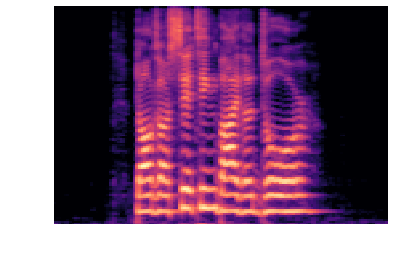

In [40]:
emotion = emotions[0]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/81 [00:00<?, ?it/s]


Emotion: bored
datasets/kaymodb/bored
datasets/kaymodb_images/bored





100%|██████████| 81/81 [00:53<00:00,  1.07it/s]


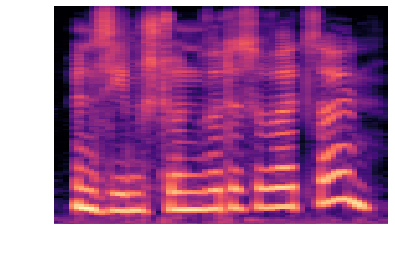

In [41]:
emotion = emotions[1]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: calm
datasets/kaymodb/calm
datasets/kaymodb_images/calm





100%|██████████| 76/76 [05:35<00:00,  4.80s/it]


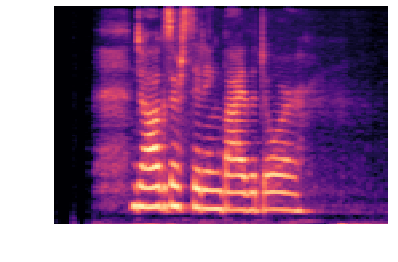

In [42]:
emotion = emotions[2]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: disgust
datasets/kaymodb/disgust
datasets/kaymodb_images/disgust





100%|██████████| 98/98 [05:01<00:00,  3.54s/it]


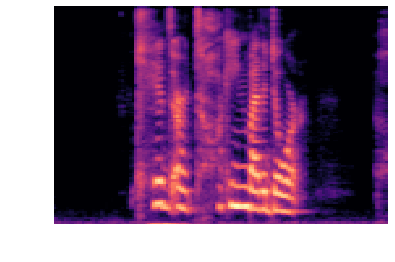

In [43]:
emotion = emotions[3]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: fearful
datasets/kaymodb/fearful
datasets/kaymodb_images/fearful





100%|██████████| 5/5 [00:27<00:00,  5.58s/it]


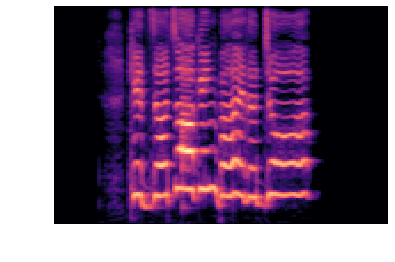

In [44]:
emotion = emotions[4]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: happy
datasets/kaymodb/happy
datasets/kaymodb_images/happy





100%|██████████| 7/7 [00:39<00:00,  5.65s/it]


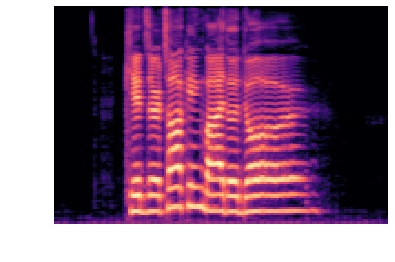

In [45]:
emotion = emotions[5]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: neutral
datasets/kaymodb/neutral
datasets/kaymodb_images/neutral





100%|██████████| 87/87 [05:35<00:00,  4.21s/it]


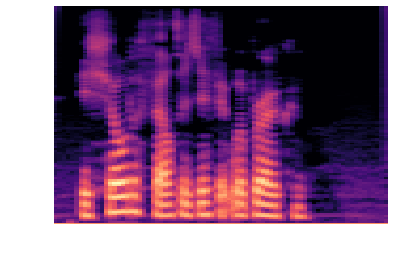

In [46]:
emotion = emotions[6]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: sad
datasets/kaymodb/sad
datasets/kaymodb_images/sad





100%|██████████| 98/98 [09:17<00:00,  6.33s/it]


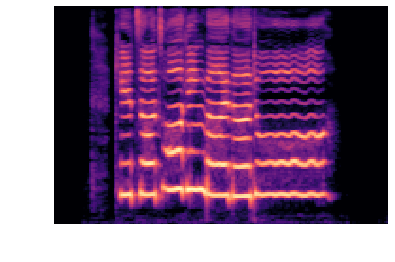

In [47]:
emotion = emotions[7]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

  0%|          | 0/100 [00:00<?, ?it/s]


Emotion: surprised
datasets/kaymodb/surprised
datasets/kaymodb_images/surprised





100%|██████████| 52/52 [02:31<00:00,  3.12s/it]


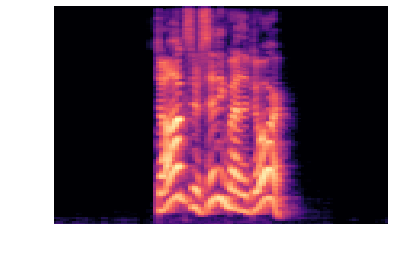

In [48]:
emotion = emotions[8]
print('\nEmotion: ' + emotion)
pathAudioEmotion = Path(pathAudio+emotion)
pathImageEmotion = Path(pathImage+emotion)
print(pathAudioEmotion)
print(pathImageEmotion)
print('\n\n')
audio_to_spectrogram(pathAudioEmotion, pathImageEmotion)

In [49]:
! find datasets/kaymodb_images/ -type f | wc -l

3467


In [0]:
## ZIP AND DOWNLOAD IMAGES! FINALYYYYYY!
!zip -r /content/kaymodb_images.zip /content/datasets/kaymodb_images/

In [84]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
!cp -r kaymodb_images.zip kaymodb.csv gdrive/My\ Drive/

## Training ResNet model using transfer learning

In [0]:
bs = 16
np.random.seed(42)
data = ImageDataBunch.from_folder(pathImage, train='.', valid_pct=0.1,
        ds_tfms=None, size=224, num_workers=4, bs=bs).normalize(imagenet_stats)

In [87]:
data.classes, data.c

(['angry',
  'bored',
  'calm',
  'disgust',
  'fearful',
  'happy',
  'neutral',
  'sad',
  'surprised'],
 9)

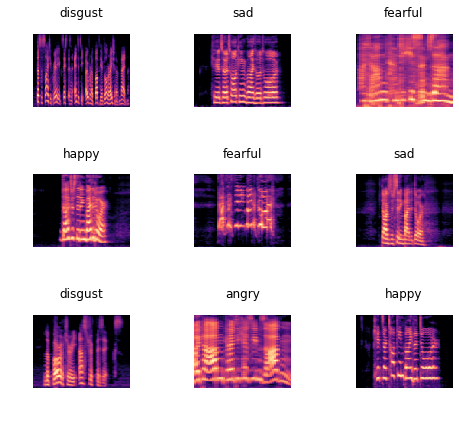

In [88]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.model

In [90]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.901365,1.542372,0.468208,00:37
1,1.549143,1.298883,0.520231,00:36
2,1.194285,1.231798,0.537572,00:36
3,1.012360,1.167379,0.557803,00:36


In [0]:
learn.save('stage-1')

In [92]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

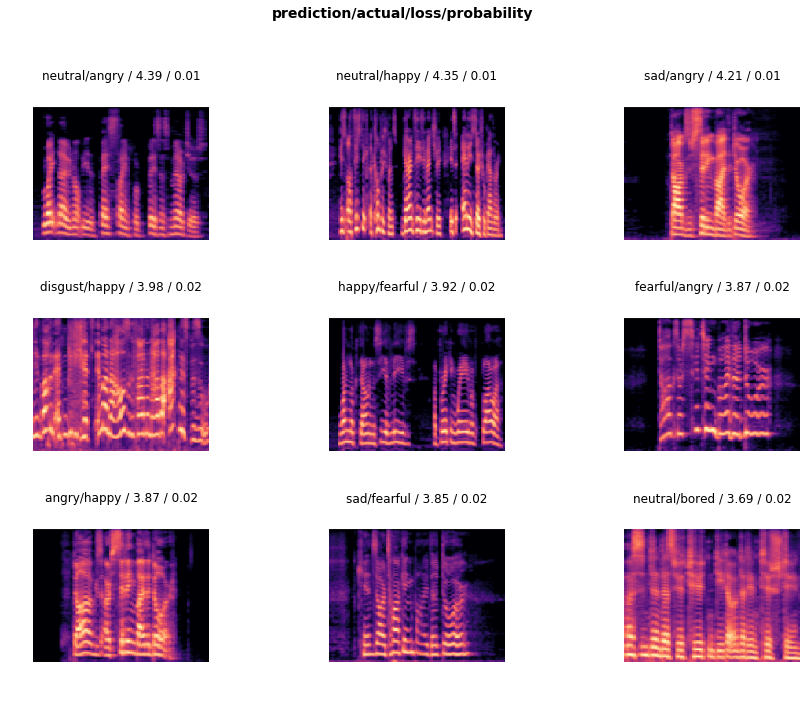

In [93]:
interp.plot_top_losses(9, figsize=(15,11))

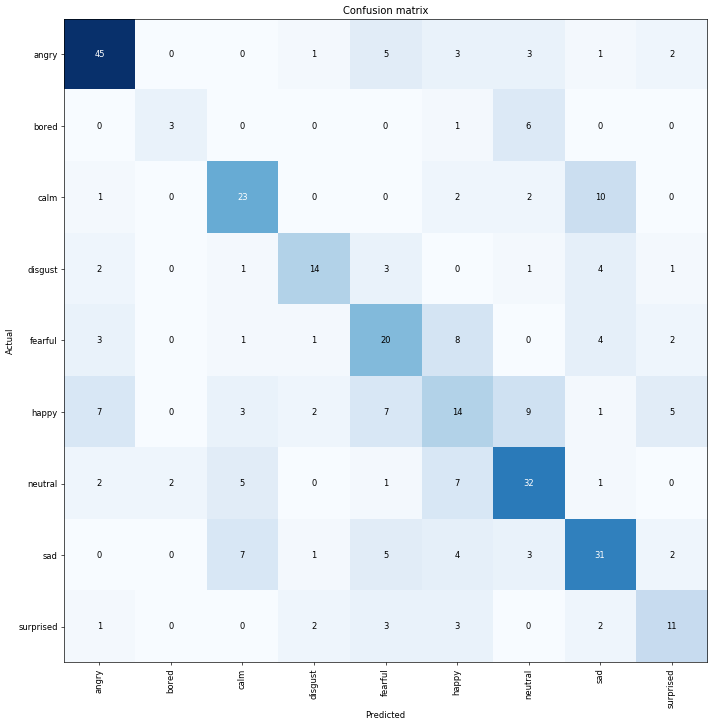

In [94]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [95]:
interp.most_confused(min_val=2)

[('calm', 'sad', 10),
 ('happy', 'neutral', 9),
 ('fearful', 'happy', 8),
 ('happy', 'angry', 7),
 ('happy', 'fearful', 7),
 ('neutral', 'happy', 7),
 ('sad', 'calm', 7),
 ('bored', 'neutral', 6),
 ('angry', 'fearful', 5),
 ('happy', 'surprised', 5),
 ('neutral', 'calm', 5),
 ('sad', 'fearful', 5),
 ('disgust', 'sad', 4),
 ('fearful', 'sad', 4),
 ('sad', 'happy', 4),
 ('angry', 'happy', 3),
 ('angry', 'neutral', 3),
 ('disgust', 'fearful', 3),
 ('fearful', 'angry', 3),
 ('happy', 'calm', 3),
 ('sad', 'neutral', 3),
 ('surprised', 'fearful', 3),
 ('surprised', 'happy', 3),
 ('angry', 'surprised', 2),
 ('calm', 'happy', 2),
 ('calm', 'neutral', 2),
 ('disgust', 'angry', 2),
 ('fearful', 'surprised', 2),
 ('happy', 'disgust', 2),
 ('neutral', 'angry', 2),
 ('neutral', 'bored', 2),
 ('sad', 'surprised', 2),
 ('surprised', 'disgust', 2),
 ('surprised', 'sad', 2)]

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [97]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,1.263642,0.963526,0.615607,00:45


In [98]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


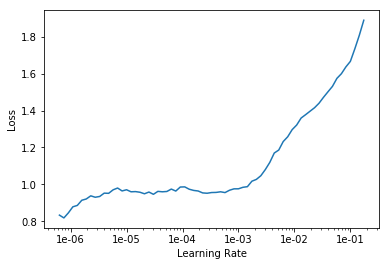

In [99]:
learn.recorder.plot()

In [100]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.881980,0.820762,0.699422,00:45
1,0.760566,0.784144,0.736994,00:45


## Training: resnet50

In [0]:
data = ImageDataBunch.from_folder(pathImage, train='.', valid_pct=0.1,
        ds_tfms=None, size=224, num_workers=4, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


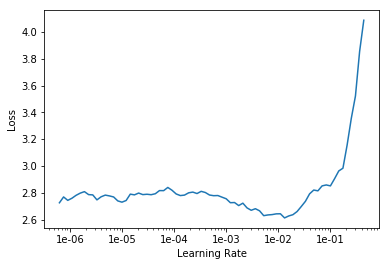

In [106]:
learn.lr_find()
learn.recorder.plot()

In [107]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.984480,1.559647,0.442197,01:12
1,1.641453,1.428857,0.462428,01:08
2,1.483977,1.241431,0.543353,01:08
3,1.262527,1.184656,0.543353,01:08
4,1.035488,1.101711,0.595376,01:08
5,0.915015,1.088955,0.595376,01:08
6,0.740681,1.085069,0.595376,01:08
7,0.668262,1.053219,0.598266,01:08


In [0]:
learn.save('stage-1-50')

In [109]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,1.611341,1.490224,0.456647,01:37
1,1.331202,1.069754,0.612717,01:36
2,0.588949,0.870195,0.702312,01:36


In [0]:
learn.save('stage-1-50_2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

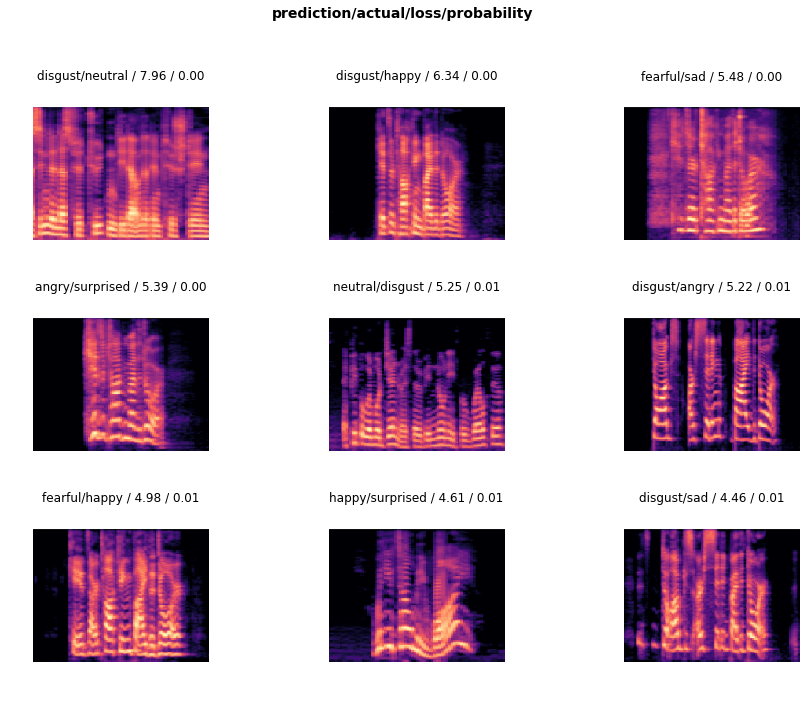

In [112]:
interp.plot_top_losses(9, figsize=(15,11))

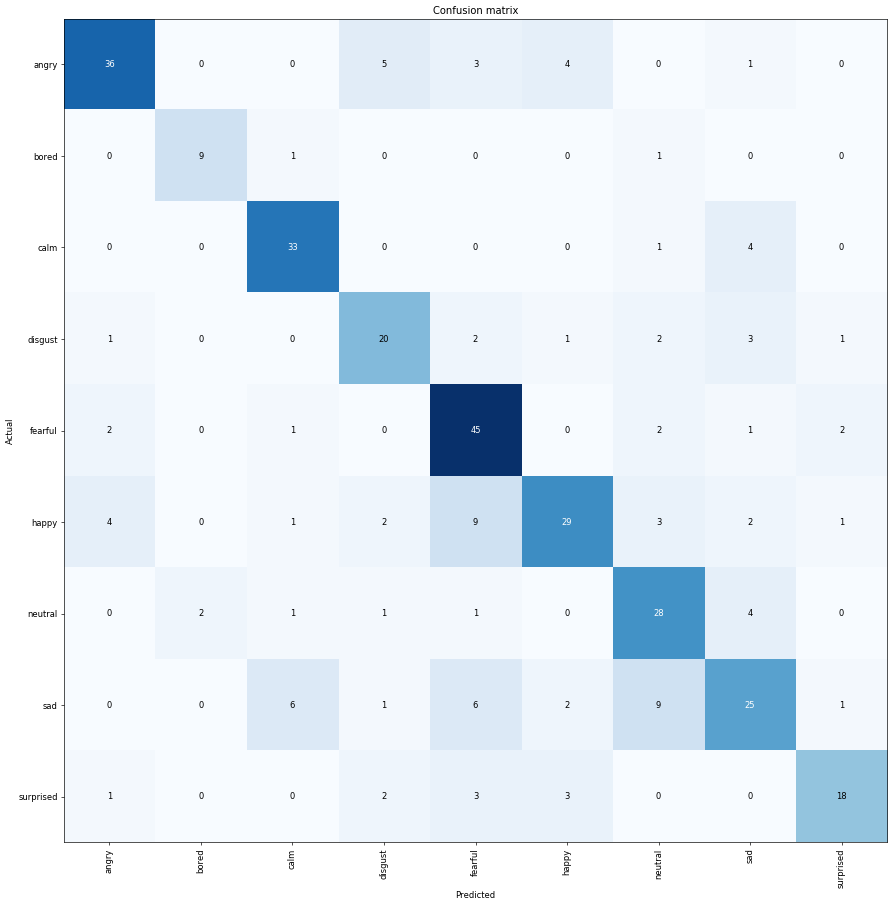

In [113]:
interp.plot_confusion_matrix(figsize=(15,15), dpi=60)

In [114]:
interp.most_confused(min_val=2)

[('happy', 'fearful', 9),
 ('sad', 'neutral', 9),
 ('sad', 'calm', 6),
 ('sad', 'fearful', 6),
 ('angry', 'disgust', 5),
 ('angry', 'happy', 4),
 ('calm', 'sad', 4),
 ('happy', 'angry', 4),
 ('neutral', 'sad', 4),
 ('angry', 'fearful', 3),
 ('disgust', 'sad', 3),
 ('happy', 'neutral', 3),
 ('surprised', 'fearful', 3),
 ('surprised', 'happy', 3),
 ('disgust', 'fearful', 2),
 ('disgust', 'neutral', 2),
 ('fearful', 'angry', 2),
 ('fearful', 'neutral', 2),
 ('fearful', 'surprised', 2),
 ('happy', 'disgust', 2),
 ('happy', 'sad', 2),
 ('neutral', 'bored', 2),
 ('sad', 'happy', 2),
 ('surprised', 'disgust', 2)]

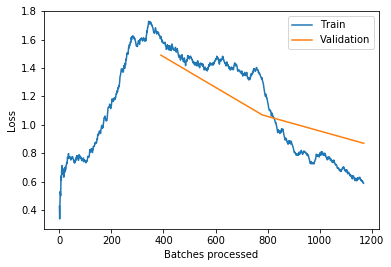

In [115]:
learn.recorder.plot_losses()

In [0]:
!mkdir models/fastai_new

In [0]:
!cp datasets/kaymodb_images/models/* models/fastai_new/

In [0]:
!cp -r models/ gdrive/My\ Drive/KayMo